In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

'Colab Notebooks'  'Getting started.pdf'   image-classification-project


In [ ]:
train_data_dir=('/content/drive/My Drive/image-classification-project/data/train')
val_data_dir=('/content/drive/My Drive/image-classification-project/data/val')
test_data_dir=('/content/drive/My Drive/image-classification-project/data/test')

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)


from sklearn.model_selection import train_test_split

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l1, l2, l1_l2
# from keras import layers, models, regularizers

In [ ]:
# Get all the data in the directory data/test , and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_data_dir,
                                                                        target_size=(196, 196), batch_size=32, class_mode='binary',shuffle=False)
# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_data_dir,
                                                                         target_size=(196, 196), batch_size=32, class_mode='binary')
# Get all the data in the directory data/val, and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_data_dir,
                                                                       target_size=(196, 196), batch_size=32, class_mode='binary')

Found 624 images belonging to 2 classes.
Found 4714 images belonging to 2 classes.
Found 521 images belonging to 2 classes.


In [ ]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
total_images_train_normal = os.listdir('/content/drive/My Drive/image-classification-project/data/train/NORMAL')
total_images_train_pneumonia = os.listdir('/content/drive/My Drive/image-classification-project/data/train/PNEUMONIA')

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(8, (7, 7), padding='same', activation='relu', input_shape=(196, 196, 3)))
cnn.add(Conv2D(8, (7, 7), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size = (3, 3)))

cnn.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
cnn.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(MaxPooling2D(pool_size = (3, 3)))

cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(MaxPooling2D(pool_size = (2, 2)))


cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(lr=0.0001, decay=1e-5)
cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 196, 196, 8)       1184      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 196, 196, 8)       3144      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 65, 65, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 65, 65, 16)        3216      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 65, 65, 16)        6416      
_________________________________________________________________
dropout_6 (Dropout)          (None, 65, 65, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 21, 21, 16)       

In [ ]:
cnn_history = cnn.fit_generator(train_generator, epochs=100, validation_data=val_generator )

Epoch 1/100
148/148 [==============================] - 55s 373ms/step - loss: 0.0636 - accuracy: 0.9777 - val_loss: 0.0160 - val_accuracy: 0.9770
Epoch 2/100
148/148 [==============================] - 53s 360ms/step - loss: 0.0721 - accuracy: 0.9737 - val_loss: 0.0153 - val_accuracy: 0.9693
Epoch 3/100
148/148 [==============================] - 53s 360ms/step - loss: 0.0558 - accuracy: 0.9777 - val_loss: 0.4593 - val_accuracy: 0.9616
Epoch 4/100
148/148 [==============================] - 54s 368ms/step - loss: 0.0592 - accuracy: 0.9775 - val_loss: 0.1427 - val_accuracy: 0.9424
Epoch 5/100
148/148 [==============================] - 53s 359ms/step - loss: 0.0526 - accuracy: 0.9815 - val_loss: 0.0540 - val_accuracy: 0.9750
Epoch 6/100
148/148 [==============================] - 54s 363ms/step - loss: 0.0517 - accuracy: 0.9830 - val_loss: 0.0407 - val_accuracy: 0.9405
Epoch 7/100
148/148 [==============================] - 53s 360ms/step - loss: 0.0503 - accuracy: 0.9824 - val_loss: 0.1026 -

In [ ]:
test_loss, test_accuracy = cnn.evaluate_generator(test_generator, 624)
print("Test loss= ", test_loss, "\n Test accuracy = ", test_accuracy)

Test loss=  8.107320785522461 
 Test accuracy =  0.7625308036804199


In [ ]:
test_images

array([[[[0.06666667, 0.06666667, 0.06666667],
         [0.07058824, 0.07058824, 0.07058824],
         [0.05882353, 0.05882353, 0.05882353],
         ...,
         [0.08627451, 0.08627451, 0.08627451],
         [0.07843138, 0.07843138, 0.07843138],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.0627451 , 0.0627451 , 0.0627451 ],
         [0.06666667, 0.06666667, 0.06666667],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.09019608, 0.09019608, 0.09019608],
         [0.10980393, 0.10980393, 0.10980393],
         [0.09019608, 0.09019608, 0.09019608]],

        [[0.0627451 , 0.0627451 , 0.0627451 ],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.05882353, 0.05882353, 0.05882353],
         ...,
         [0.09019608, 0.09019608, 0.09019608],
         [0.07843138, 0.07843138, 0.07843138],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        ...,

        [[0.07843138, 0.07843138, 0.07843138],
         [0.07450981, 0.07450981, 0.07450981]

In [ ]:
y_pred = cnn.predict_generator(test_generator)
print(y_pred,len(y_pred), "\n------------------------------------")
y_pred = np.argmax(y_pred, axis=-1)
print(y_pred, len(y_pred))


[[9.95406985e-01]
 [9.99986768e-01]
 [9.99962687e-01]
 [9.99729931e-01]
 [9.99999523e-01]
 [9.98976350e-01]
 [9.90321696e-01]
 [9.99999881e-01]
 [1.78608671e-03]
 [9.99994874e-01]
 [6.53914968e-03]
 [4.49448780e-05]
 [9.99999881e-01]
 [9.99999523e-01]
 [9.99621749e-01]
 [1.00000000e+00]
 [9.99999881e-01]
 [9.98759747e-01]
 [9.99995232e-01]
 [9.99760687e-01]
 [9.99999285e-01]
 [9.99999642e-01]
 [9.99999881e-01]
 [2.37471773e-04]
 [1.00000000e+00]
 [9.99999166e-01]
 [9.99999881e-01]
 [9.99999523e-01]
 [9.99967933e-01]
 [9.99812067e-01]
 [1.31247052e-05]
 [9.99999881e-01]
 [9.99948502e-01]
 [9.99983788e-01]
 [9.99994755e-01]
 [9.99999881e-01]
 [9.99996781e-01]
 [1.00000000e+00]
 [5.36696076e-01]
 [6.76836669e-01]
 [9.99999881e-01]
 [9.99957561e-01]
 [9.99998331e-01]
 [1.00000000e+00]
 [9.99999762e-01]
 [9.99999881e-01]
 [9.98908401e-01]
 [1.98608323e-04]
 [1.00000000e+00]
 [9.99997854e-01]
 [9.99987125e-01]
 [1.00000000e+00]
 [9.99862552e-01]
 [1.58352807e-01]
 [9.99996781e-01]
 [9.999125

In [ ]:
from sklearn.metrics import classification_report
pred = cnn.predict(train_images)
len(pred)
# print(classification_report(np.argmax(train_labels, axis = 1),np.argmax(pred, axis = 1)))

32

In [ ]:
test_generator.reset()
Y_pred = cnn.predict_generator(test_generator)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
print(sum(y_pred==classes)/624)

from sklearn.metrics import confusion_matrix
confusion_matrix(test_generator.classes[test_generator.index_array],y_pred)


0.375


array([[234,   0],
       [390,   0]])

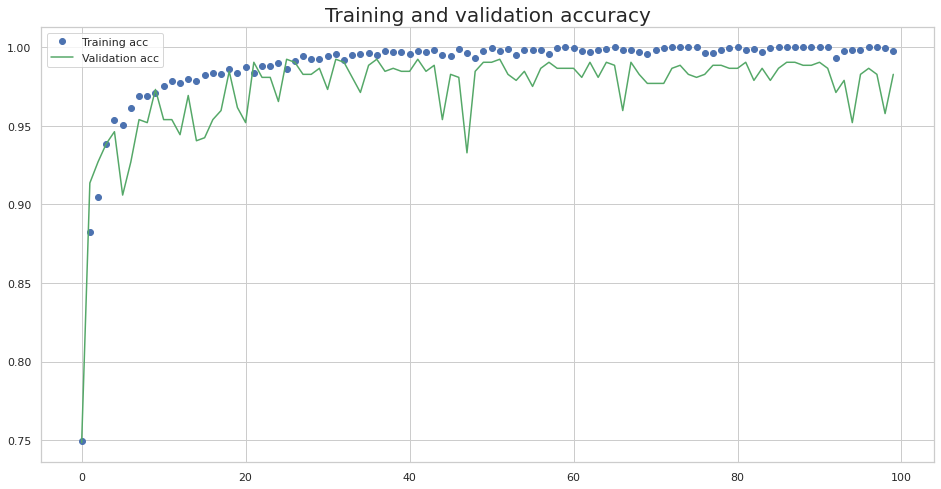

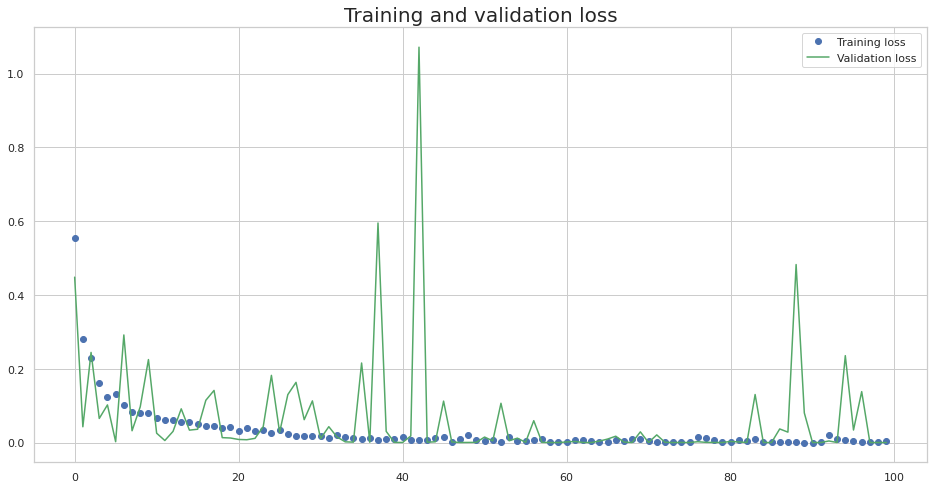

In [ ]:
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(16,8))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy',fontsize=20 )
plt.legend()
plt.figure(figsize=(16,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss', fontsize=20)
plt.legend()
plt.show()